In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import os, sys, glob
sys.path.append('../')
from plotters import hexbin_plotter

In [2]:
df_Obs = pd.read_csv('Heligoland_wind.csv',index_col=0,parse_dates=True)
# Creating a MultiIndex for columns
multi_index = pd.MultiIndex.from_product([['Obs_wind_speed'], df_Obs.columns])
# Assigning the MultiIndex to DataFrame columns
df_Obs.columns = multi_index
# Resampling the data to hourly frequency, by averaging the values
df_Obs = df_Obs.resample('H').mean() #['Obs_wind_speed']['ws_50_m']
df_Obs #['Obs_wind_speed']['ws_50_m']

Obs_wind_speed                                   \
                           ws_40_m    ws_50_m    ws_60_m    ws_70_m   
2017-03-23 12:00:00       8.024000   8.504000   9.022000   9.524000   
2017-03-23 13:00:00       7.226667   7.501667   7.760000   8.003333   
2017-03-23 14:00:00       6.666667   7.003333   7.420000   7.873333   
2017-03-23 15:00:00       7.680000   8.188333   8.731667   9.231667   
2017-03-23 16:00:00       8.901667   9.526667  10.125000  10.726667   
...                            ...        ...        ...        ...   
2018-04-11 19:00:00      14.833333  15.201667  15.446667  15.655000   
2018-04-11 20:00:00      14.356667  14.701667  15.001667  15.228333   
2018-04-11 21:00:00      13.496667  13.908333  14.165000  14.363333   
2018-04-11 22:00:00      12.871667  13.173333  13.438333  13.718333   
2018-04-11 23:00:00      11.565000  11.908333  12.176667  12.418333   

                                                                            \
                       ws_80_m    ws_90_m   ws_100_m   ws_120_m   ws_140_m   
2017-03-23 12:00:00  10.024000  10.440000  10.778000  11.068000  10.994000   
2017-03-23 13:00:00   8.321667   8.608333   8.881667   9.338333   9.806667   
2017-03-23 14:00:00   8.346667   8.816667   9.250000   9.958333  10.498333   
2017-03-23 15:00:00   9.663333   9.958333  10.131667  10.358333  10.540000   
2017-03-23 16:00:00  11.285000  11.635000  11.848333  12.058333  12.080000   
...                        ...        ...        ...        ...        ...   
2018-04-11 19:00:00  15.865000  16.046667  16.221667  16.588333  16.811667   
2018-04-11 20:00:00  15.476667  15.705000  15.885000  16.186667  16.388333   
2018-04-11 21:00:00  14.606667  14.826667  15.008333  15.238333  15.405000   
2018-04-11 22:00:00  13.936667  14.108333  14.291667  14.563333  14.831667   
2018-04-11 23:00:00  12.605000  12.743333  12.876667  13.113333  13.271667   

                                ...                                   \
                      ws_160_m  ...   ws_260_m   ws_280_m   ws_300_m   
2017-03-23 12:00:00  10.860000  ...  11.022000  11.132000  11.216000   
2017-03-23 13:00:00  10.258333  ...  11.036667  11.070000  11.106667   
2017-03-23 14:00:00  10.861667  ...  11.058333  11.028333  10.998333   
2017-03-23 15:00:00  10.625000  ...  10.703333  10.716667  10.701667   
2017-03-23 16:00:00  12.021667  ...  11.680000  11.623333  11.568333   
...                        ...  ...        ...        ...        ...   
2018-04-11 19:00:00  16.981667  ...  17.843333  17.950000  18.031667   
2018-04-11 20:00:00  16.478333  ...  16.541667  16.468333  16.508333   
2018-04-11 21:00:00  15.543333  ...  15.885000  15.996667  16.120000   
2018-04-11 22:00:00  15.046667  ...  15.798333  15.985000  16.188333   
2018-04-11 23:00:00  13.430000  ...  14.165000  14.371667  14.636667   

                                                                            \
                      ws_320_m   ws_340_m   ws_360_m   ws_380_m   ws_400_m   
2017-03-23 12:00:00  11.254000  11.274000  11.226000  11.190000  11.164000   
2017-03-23 13:00:00  11.146667  11.198333  11.253333  11.323333  11.310000   
2017-03-23 14:00:00  10.970000  10.951667  10.953333  10.953333  10.933333   
2017-03-23 15:00:00  10.723333  10.726667  10.680000  10.720000  10.760000   
2017-03-23 16:00:00  11.511667  11.458333  11.396667  11.370000  11.348333   
...                        ...        ...        ...        ...        ...   
2018-04-11 19:00:00  18.090000  18.225000  18.378333  18.523333  18.680000   
2018-04-11 20:00:00  16.611667  16.621667  16.640000  16.740000  16.883333   
2018-04-11 21:00:00  16.241667  16.416667  16.541667  16.681667  16.908333   
2018-04-11 22:00:00  16.390000  16.493333  16.570000  16.610000  16.745000   
2018-04-11 23:00:00  14.933333  15.226667  15.396667  15.438333  15.383333   

                                           
                      ws_450_m   ws_500_m  
2017-03-23 12:00:00  11.106000  11.074000

In [4]:
CERRA_wind = xr.open_mfdataset(['CERRA_height_level/2017.nc','CERRA_height_level/2018.nc'],concat_dim='time',combine='nested',parallel=True)
df_CERRA = CERRA_wind.data.sel(obs=10).drop(['lat', 'lon']).to_dataframe(name='CERRA_wind_speed')
df_CERRA = df_CERRA.pivot_table(index='time', columns='heightAboveGround')
df_CERRA #['CERRA_wind_speed'][50.0]

CERRA_wind_speed                                   \
heightAboveGround              10.0       15.0       30.0       50.0    
time                                                                    
2017-01-01 00:00:00        14.358519  14.638402  15.437111  16.047323   
2017-01-01 01:00:00        13.999522  14.310348  15.117357  15.703793   
2017-01-01 02:00:00        14.101475  14.428643  15.243249  15.836706   
2017-01-01 03:00:00        13.979312  14.259581  15.063206  15.655590   
2017-01-01 04:00:00        14.104421  14.448065  15.269583  15.872751   
...                              ...        ...        ...        ...   
2018-12-31 19:00:00        11.884296  12.207248  12.934774  13.522358   
2018-12-31 20:00:00        12.457071  12.720173  13.503771  14.118941   
2018-12-31 21:00:00        12.081650  12.365162  13.173872  13.792901   
2018-12-31 22:00:00        12.754777  13.034994  13.842511  14.475731   
2018-12-31 23:00:00        13.115845  13.498597  14.344131  14.998956   

                                                                            \
heightAboveGround        75.0       100.0      150.0      200.0      250.0   
time                                                                         
2017-01-01 00:00:00  16.589476  16.997135  17.613314  18.184341  18.821638   
2017-01-01 01:00:00  16.213719  16.588788  17.151717  17.641916  18.187468   
2017-01-01 02:00:00  16.353661  16.739823  17.317929  17.831495  18.462436   
2017-01-01 03:00:00  16.184399  16.576605  17.151763  17.682421  18.187180   
2017-01-01 04:00:00  16.396465  16.788883  17.377525  17.901140  18.428594   
...                        ...        ...        ...        ...        ...   
2018-12-31 19:00:00  14.080390  14.526326  15.323472  16.149979  16.868574   
2018-12-31 20:00:00  14.689713  15.140662  15.959880  16.772768  17.462869   
2018-12-31 21:00:00  14.350440  14.793792  15.629809  16.576807  17.486662   
2018-12-31 22:00:00  15.065557  15.539628  16.458399  17.499977  18.473204   
2018-12-31 23:00:00  15.603394  16.085656  16.952769  17.899752  18.869515   

                                                      
heightAboveGround        300.0      400.0      500.0  
time                                                  
2017-01-01 00:00:00  19.369085  19.866462  20.101811  
2017-01-01 01:00:00  18.553848  18.770339  19.169993  
2017-01-01 02:00:00  18.959488  18.696271  18.650985  
2017-01-01 03:00:00  18.347919  18.393268  18.971777  
2017-01-01 04:00:00  18.577368  18.443174  19.389471  
...                        ...        ...        ...  
2018-12-31 19:00:00  17.267826  17.851890  18.258319  
2018-12-31 20:00:00  17.887483  18.121145  18.171531  
2018-12-31 21:00:00  17.902939  17.428267  16.873943  
2018-12-31 22:00:00  19.020515  18.932970  18.564057  
2018-12-31 23:00:00  19.521281  19.121784  18.533375  

[17520 rows x 12 columns]

In [5]:
df_merged = pd.merge(df_Obs, df_CERRA, left_index=True, right_index=True, how='inner')
df_merged.dropna(inplace=True)

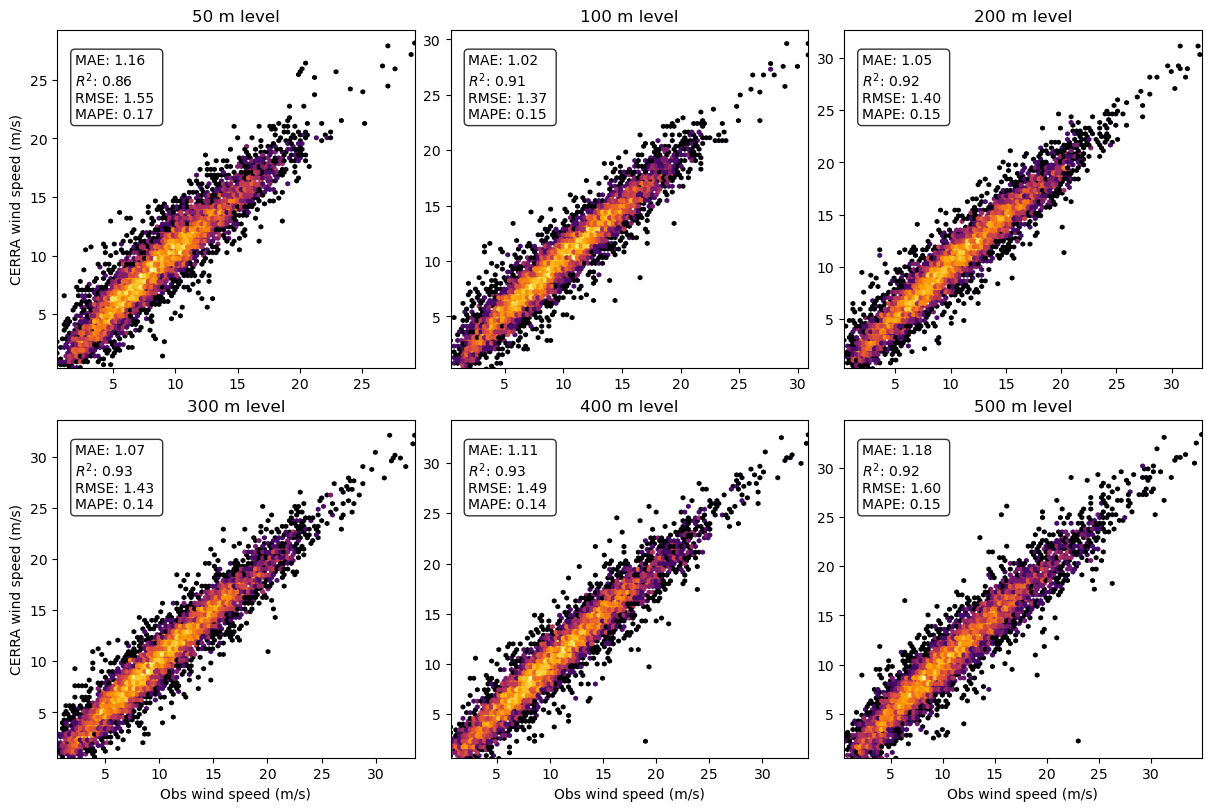

In [7]:
common_levels = [50, 100,200,300,400,500]

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = fig.add_gridspec(2,3)
for i,level in enumerate(common_levels):
    xlabel = 'Obs wind speed (m/s)' if i//3 == 1 else False
    ylabel = 'CERRA wind speed (m/s)' if i%3 == 0 else False
    hexbin_plotter(fig,gs[i//3, i%3],df_merged['Obs_wind_speed'][f'ws_{level}_m'], 
                   df_merged['CERRA_wind_speed'][level],f'{level} m level',text_arg=True,xlabel=xlabel,ylabel=ylabel)
plt.savefig('Heligoland_CERRA_vs_Obs_wind_speed.png',dpi=300)

In [8]:
ds_ERA5 = xr.open_dataset('ERA5.nc')
df_ERA5 = ds_ERA5[['10ws','100ws']].isel(location=10).drop(['latitude', 'longitude','year']).to_dataframe()   
multi_index = pd.MultiIndex.from_product([['ERA5_wind_speed'], df_ERA5.columns])
# Assigning the MultiIndex to DataFrame columns
df_ERA5.columns = multi_index
# Converting the index to datetime
df_ERA5.index = pd.to_datetime(df_ERA5.index)
# Merging the DataFrames
df_merged = pd.merge(df_merged,df_ERA5, left_index=True, right_index=True, how='inner')

In [9]:
df_merged

Obs_wind_speed                                   \
                           ws_40_m    ws_50_m    ws_60_m    ws_70_m   
2017-03-23 12:00:00       8.024000   8.504000   9.022000   9.524000   
2017-03-23 13:00:00       7.226667   7.501667   7.760000   8.003333   
2017-03-23 14:00:00       6.666667   7.003333   7.420000   7.873333   
2017-03-23 15:00:00       7.680000   8.188333   8.731667   9.231667   
2017-03-23 16:00:00       8.901667   9.526667  10.125000  10.726667   
...                            ...        ...        ...        ...   
2018-04-10 22:00:00      15.785000  16.266667  16.663333  16.998333   
2018-04-10 23:00:00      16.036667  16.523333  16.890000  17.196667   
2018-04-11 14:00:00      10.570000  11.231667  11.800000  12.250000   
2018-04-11 15:00:00      10.830000  11.555000  12.185000  12.731667   
2018-04-11 23:00:00      11.565000  11.908333  12.176667  12.418333   

                                                                            \
                       ws_80_m    ws_90_m   ws_100_m   ws_120_m   ws_140_m   
2017-03-23 12:00:00  10.024000  10.440000  10.778000  11.068000  10.994000   
2017-03-23 13:00:00   8.321667   8.608333   8.881667   9.338333   9.806667   
2017-03-23 14:00:00   8.346667   8.816667   9.250000   9.958333  10.498333   
2017-03-23 15:00:00   9.663333   9.958333  10.131667  10.358333  10.540000   
2017-03-23 16:00:00  11.285000  11.635000  11.848333  12.058333  12.080000   
...                        ...        ...        ...        ...        ...   
2018-04-10 22:00:00  17.316667  17.576667  17.806667  18.251667  18.650000   
2018-04-10 23:00:00  17.476667  17.720000  17.931667  18.360000  18.673333   
2018-04-11 14:00:00  12.658333  12.998333  13.303333  13.860000  14.383333   
2018-04-11 15:00:00  13.205000  13.573333  13.890000  14.488333  14.951667   
2018-04-11 23:00:00  12.605000  12.743333  12.876667  13.113333  13.271667   

                                ... CERRA_wind_speed                        \
                      ws_160_m  ...             75.0      100.0      150.0   
2017-03-23 12:00:00  10.860000  ...         9.303196   9.682311   9.888131   
2017-03-23 13:00:00  10.258333  ...         8.979545   9.565446  10.104283   
2017-03-23 14:00:00  10.861667  ...         9.985533  10.663142  11.131642   
2017-03-23 15:00:00  10.625000  ...         9.818684  10.265827  10.488548   
2017-03-23 16:00:00  12.021667  ...        10.117149  10.557183  10.788175   
...                        ...  ...              ...        ...        ...   
2018-04-10 22:00:00  18.998333  ...        17.216317  17.704232  18.461726   
2018-04-10 23:00:00  18.913333  ...        16.480753  16.953092  17.684396   
2018-04-11 14:00:00  14.865000  ...        15.433409  16.100402  17.148485   
2018-04-11 15:00:00  15.330000  ...        14.729559  15.335816  16.294445   
2018-04-11 23:00:00  13.430000  ...        12.617177  12.921806  13.410818   

                                                                            \
                         200.0      250.0      300.0      400.0      500.0   
2017-03-23 12:00:00   9.936667  10.044954  10.226426  10.690767  11.172059   
2017-03-23 13:00:00  10.358266  10.551702  10.726713  11.047248  11.321177   
2017-03-23 14:00:00  11.247490  11.301587  11.347363  11.406029  11.481140   
2017-03-23 15:00:00  10.560410  10.594470  10.614524  10.612992  10.596967   
2017-03-23 16:00:00  10.875543  10.925095  10.945251  10.938794  10.938998   
...                        ...        ...        ...        ...        ...   
2018-04-10 22:00:00  19.141383  19.889264  20.887949  23.818259  22.653647   
2018-04-10 23:00:00  18.338167  19.074415  20.064597  22.760462  21.390733   
2018-04-11 14:00:00  17.872551  18.333471  18.700320  19.607324  20.260400   
2018-04-11 15:00:00  16.977418  17.412803  17.720186  18.243866  19.176010   
2018-04-11 23:00:00  13.842238  14.438657  15.506441  17.155874  15.768158   

                    ERA5_wind_speed             
  

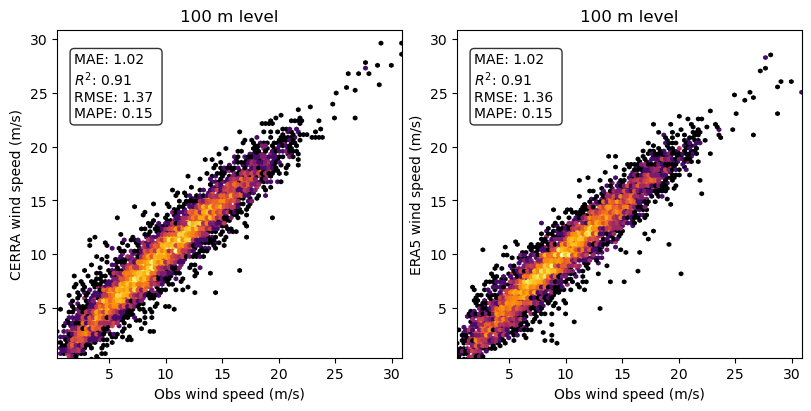

In [10]:
level = 100
fig = plt.figure(figsize=(8, 4), constrained_layout=True)
gs = fig.add_gridspec(1,2)
xlabel = 'Obs wind speed (m/s)'
ylabel = 'CERRA wind speed (m/s)'
hexbin_plotter(fig,gs[0, 0],df_merged['Obs_wind_speed'][f'ws_{level}_m'], 
                df_merged['CERRA_wind_speed'][level],f'{level} m level',text_arg=True,xlabel=xlabel,ylabel=ylabel)
ylabel = 'ERA5 wind speed (m/s)'
hexbin_plotter(fig,gs[0, 1],df_merged['Obs_wind_speed'][f'ws_{level}_m'], 
                df_merged['ERA5_wind_speed'][f'{level}ws'],f'{level} m level',text_arg=True,xlabel=xlabel,ylabel=ylabel)
plt.savefig('Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed.png',dpi=300)

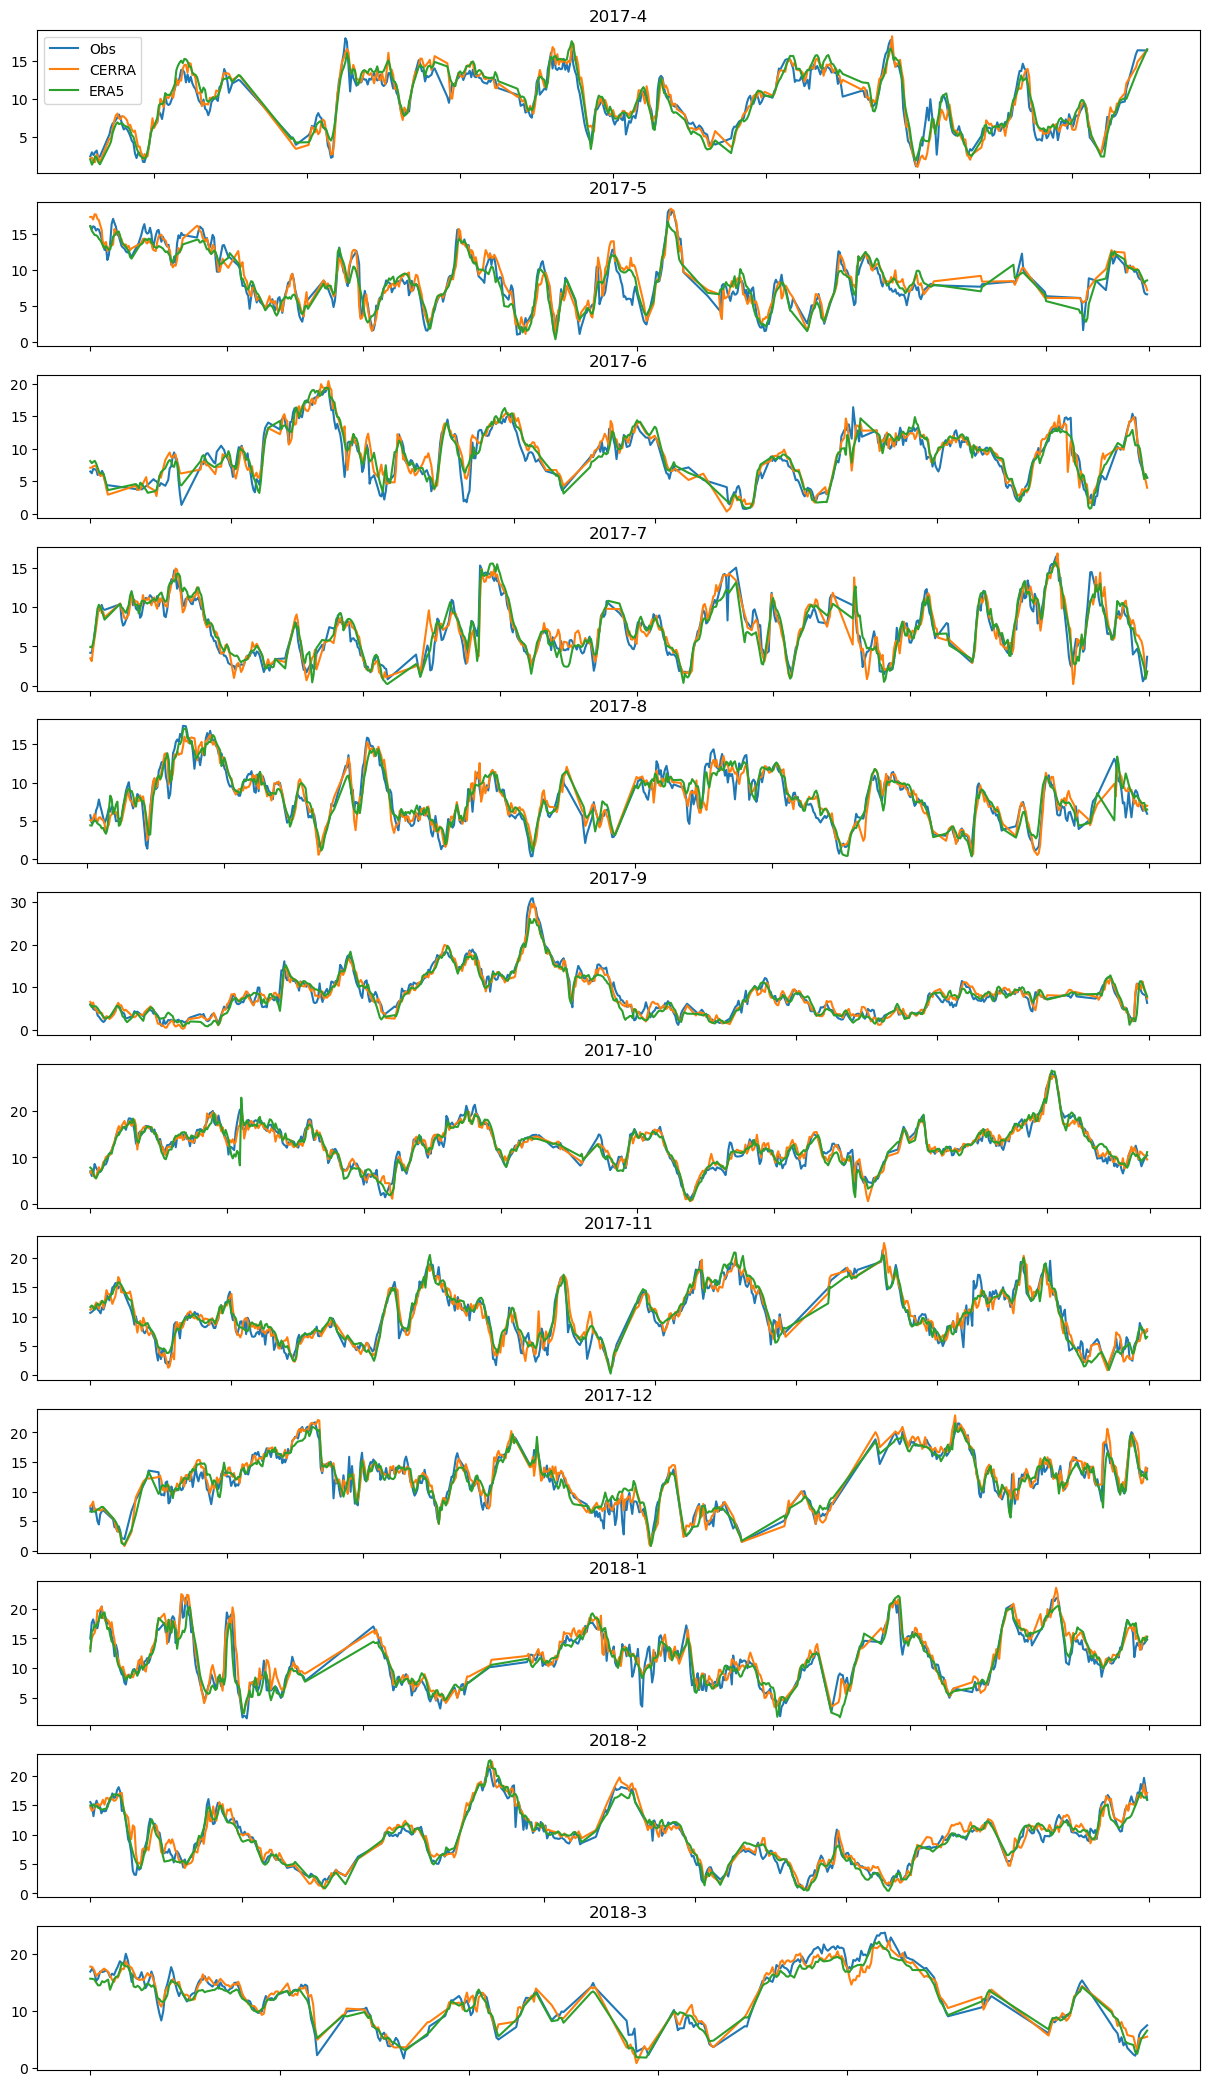

In [11]:
fig, axes = plt.subplots(12, figsize=(15, 30))
data = df_merged.loc['2017-04-01 00:00:00':'2018-04-01 00:00:00']
for i, month in enumerate(data.index.month.unique()):
    ax = axes.flatten()[i]
    data[data.index.month == month]['Obs_wind_speed'][f'ws_{level}_m'].plot(ax=ax, label='Obs')
    data[data.index.month == month]['CERRA_wind_speed'][level].plot(ax=ax, label='CERRA')
    data[data.index.month == month]['ERA5_wind_speed'][f'{level}ws'].plot(ax=ax, label='ERA5')
    ax.set_title(f'{data[data.index.month==month].index.year[0]}-{month}')
    ax.set_xticklabels('')
    ax.legend() if i == 0 else None
plt.savefig('Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_timeseries.png',dpi=300,bbox_inches='tight')

### Plotting sample profiles

In [12]:
obs_levels = [40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 450, 500]
CERRA_levels = [10., 15., 30., 50., 75., 100., 150., 200., 250., 300., 400., 500.]
ERA5_levels = [10, 100]
def profile_plotter_movie(data, rows, cols , out_file):
    fig = plt.figure(figsize=(cols*3, rows*2.5))
    gs = fig.add_gridspec(rows,cols)
    for i in range(rows*cols):
        ax = fig.add_subplot(gs[i//cols, i%cols])

        ax.plot(data['Obs_wind_speed'].iloc[i].T,obs_levels,  '--r', linewidth=2, markerfacecolor='r',label='Obs profile')
        ax.plot(data['CERRA_wind_speed'].iloc[i].T,CERRA_levels,  '-k', linewidth=2,label='CERRA profile')
        ax.plot(data['ERA5_wind_speed'].iloc[i].T, ERA5_levels, 'dg', markerfacecolor='g', label='ERA5')
        ax.set_xlim([0, 30])
        ax.set_ylim([0, 500])
        ax.set_title(data.index[i])
        xlabel = 'Wind Speed (m/s)' if i//4 == 5 else False
        ylabel = 'Height (m)' if i%4 == 0 else False
        ax.set_xlabel(xlabel) if i//4 == 5 else None
        ax.set_ylabel(ylabel) if i%4 == 0 else None
        if not ylabel:
            ax.yaxis.set_ticks([])
        if not xlabel:
            ax.xaxis.set_ticks([])

    # Place a common legend at the bottom
    plt.legend(bbox_to_anchor=(0.25, -0.3), borderaxespad=0.,ncol=3)

    if out_file:
        plt.savefig(out_file,dpi=300,bbox_inches='tight')
    plt.close()

In [13]:
data = df_merged.loc['2017-03-23 13:00:00':'2018-04-11 23:00:00']
# generate 24 random instances out of data, make sure the rows are not empty
data = data.loc[data.index.isin(np.random.choice(data.index, 24, replace=False))]

rows,cols = 6,4
out_file = 'Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles.png'

profile_plotter_movie(data, rows, cols, out_file)

## Wind profile movie

IndexError: single positional indexer is out-of-bounds

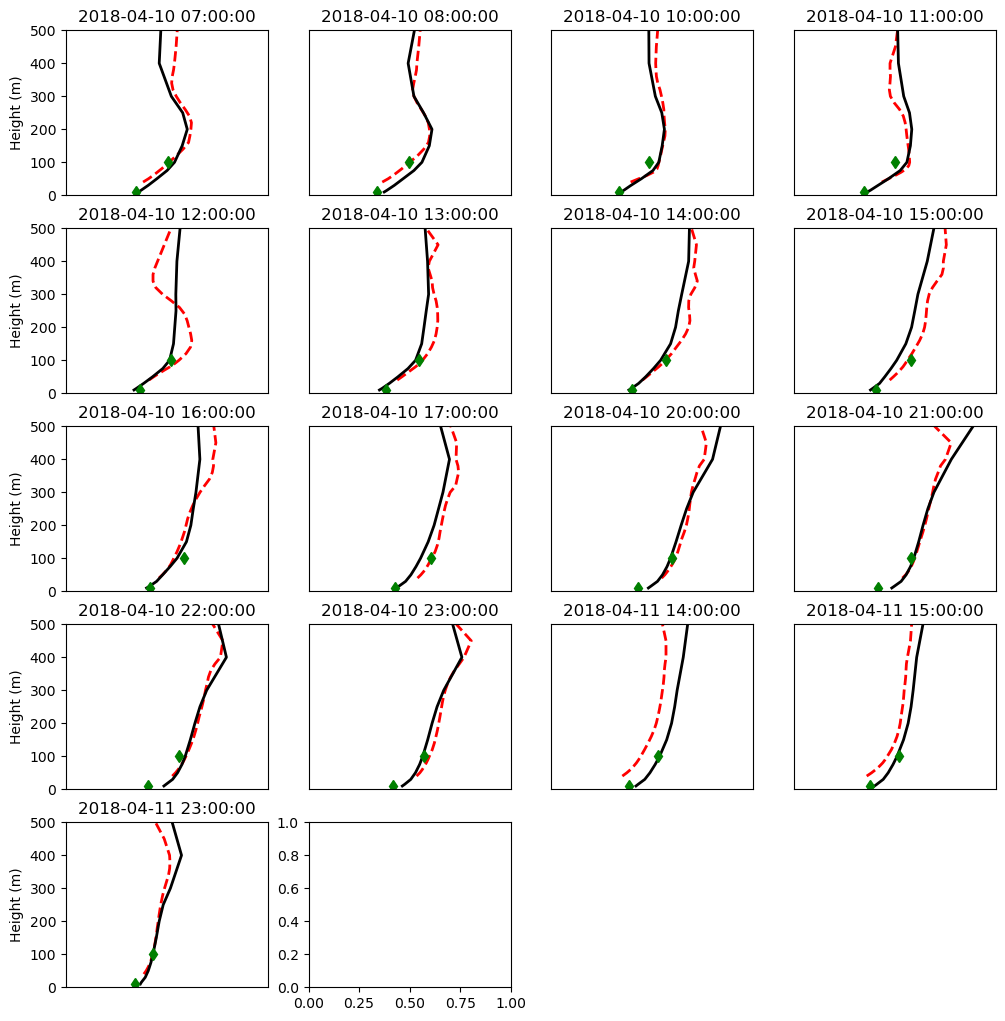

In [14]:
data = df_merged.loc['2017-03-23 13:00:00':'2018-04-11 23:00:00']
rows,cols = 6,4
[(i,min(i+rows*cols,len(data))) for i in np.arange(0,len(data),rows*cols)]
for i,j in [(i,min(i+rows*cols,len(data))) for i in np.arange(0,len(data),rows*cols)]:
    out_file = f'obs_wind_profiles_movie/Heligoland_CERRA_vs_ERA5_vs_Obs_wind_speed_profiles_{i}_{j}.png'
    profile_plotter_movie(data[i:j], rows, cols, out_file)